<a href="https://colab.research.google.com/github/RajezMariner/Deep_Learning/blob/master/SGD_Implementation_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from fastai import *
from fastai.vision import torch, tensor, nn
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [57]:
n=100

In [58]:
x = torch.ones(n, 2)

In [59]:
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[-0.2115,  1.0000],
        [-0.2004,  1.0000],
        [ 0.5285,  1.0000],
        [-0.9548,  1.0000],
        [ 0.1976,  1.0000]])

In [60]:
a = tensor([3., 2.])

In [61]:
z = x@a + torch.randn(n)

In [62]:
z

tensor([ 0.4741,  1.0369,  4.1017,  0.2126,  2.4204, -0.0622,  6.8706,  5.0931,
         0.6103,  0.8688,  0.7029,  4.5015,  1.8881,  2.7365,  1.5240, -1.3674,
         2.8585,  2.2760, -0.3098,  1.1678,  4.9080,  2.7534,  2.2222, -0.4534,
         2.4761,  3.1766,  2.2035, -0.2806,  3.5548,  1.8732,  0.1329,  4.2669,
         4.4058,  0.2689,  4.2159,  4.5249,  4.6242,  1.7150,  3.4461,  0.6515,
         4.0910,  1.1188,  2.9729,  3.6500,  0.5237,  0.0859,  2.4356,  2.3974,
         2.2921,  1.7187, -0.6799,  3.8414,  2.3192,  4.8462, -2.2830, -0.3412,
         1.6120,  1.4574, -1.1716,  2.6537, -0.9347,  0.0861,  4.8880,  0.4460,
         1.5871,  3.6696,  0.5600,  2.4849,  2.2810,  2.8966,  5.4892,  1.8263,
         1.4383,  0.0651,  2.5802,  4.5170, -0.7724,  2.7269,  3.7162,  4.7696,
         3.3685,  5.5367,  2.7975,  1.0249,  3.5188,  4.5870,  2.9002,  1.0380,
        -0.4780,  2.1275,  1.7074,  4.0347,  3.7738,  5.8728, -1.0111, -0.2219,
         2.0486,  1.0300,  4.6782,  0.64

In [63]:
%matplotlib inline

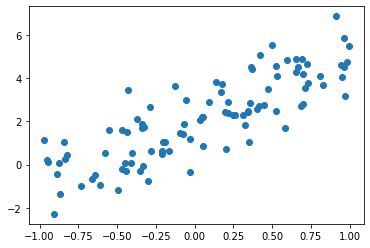

In [64]:
plt.scatter(x[:,0],z)

In [65]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [66]:
a = tensor(-1., 1.)
y_hat = x@a

In [67]:
mse(y_hat, z)

tensor(7.1034)

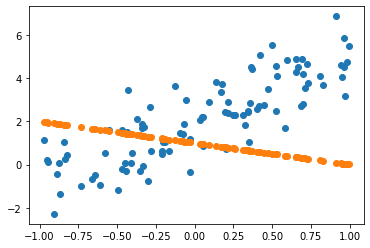

In [68]:
plt.scatter(x[:, 0], z)
plt.scatter(x[:, 0], y_hat)

Gradient Descent

In [72]:
a = nn.Parameter(a)

In [73]:
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [88]:
lr=1e-1
def update():
  y_hat = x@a
  loss = mse(y_hat, z)
  if t % 30 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [89]:
for t in range(300):
  update()

tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)
tensor(1.1099, grad_fn=<MeanBackward0>)


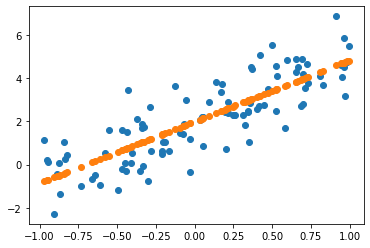

In [91]:
plt.scatter(x[:,0], z)
plt.scatter(x[:,0], x@a.detach().numpy())

In [113]:
a = nn.Parameter(tensor(1., -1.))
fig = plt.figure()
plt.scatter(x[:,0], z, c='red')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,400), interval=10, blit=True)